In [26]:
from datetime import datetime
import pandas as pd
import numpy as np


In [27]:
playerCharDict = {
"A.R.C.S. Type B":"Echegollen",
"Abyss Watcher":"Sebas",
"Aerith":"Salva",
"Batholomeus Gingersnapp III":"Max",
"Be'lakor":"Sebas",
"Blood Wolf Bueno":"Carlos",
"Blood wolfy":"Carlos",
"Blut":"Sebas",
"Boiiii":"Danny",
"Booga":"Carlos",
"CarlosChar":"Carlos",
"Castiel":"Danny",
"Cloud":"Danny",
"Crimson":"Sebas",
"Culici":"Carlos",
"Dur Hero":"Carlos",
"El Mosco":"Carlos",
"El_Don":"Carlos",
"Elvenefris":"Sebas",
"Ēostre":"Sebas",
"Fenriz":"Sebas",
"FINAL boii":"Danny",
"Finn":"Danny",
"Flint Eastwood":"Max",
"Fren":"Carlos",
"Gelbin":"Carlos",
"Gojira":"Sebas",
"Gorod":"Sebas",
"Gourd Leshy":"Sebas",
"Groa":"Echegollen",
"Groaa":"Echegollen",
"Grond":"Carlos",
"Jerma0":"Sebas",
"Kaizo":"Carlos",
"King":"Sebas",
"Klaxz":"Carlos",
"Ko":"Echegollen",
"LEGolASS":"Carlos",
"Legs":"Carlos",
"Literally Me":"Sebas",
"Lizardo Lagartijo":"Frijol",
"Lucius":"Danny",
"Luffy":"Danny",
"Lykathea":"Sebas",
"Marrmora":"Sebas",
"Mein_Don":"Carlos",
"Mekano":"Carlos",
"Melinoë":"Sebas",
"Monke":"Salva",
"Monkey D. Kaido":"Danny",
"Mr. Biscuit Oliva":"Salva",
"Muki":"Pau",
"Muky":"Pau",
"Nath":"Carlos",
"Nathaniel III":"Carlos",
"Nathaniel XIV":"Carlos",
"NeO":"Sebas",
"Nicker":"Carlos",
"Nickerr":"Carlos",
"OCnameplsnosteal":"Carlos",
"Omkivium":"Sebas",
"Omnivium":"Sebas",
"One shot one kill":"Carlos",
"Ooga":"Carlos",
"Opeth":"Sebas",
"Oso Guapo":"Sebas",
"Padre":"Carlos",
"Pajaro":"Sebas",
"pajaro":"Sebas",
"Paracletus":"Sebas",
"Pez":"Sebas",
"Pinwheel de plantas":"Sebas",
"Pnigalion":"Sebas",
"Portgas D. Ace":"Danny",
"Radagon":"Danny",
"Radagon the vengeful":"Danny",
"Ranni":"Carlos",
"Raphael":"Carlos",
"Raphaelf":"Carlos",
"Razonixx":"Carlos",
"Rip":"Carlos",
"Rip and Fren":"Carlos",
"Rip and Friends":"Carlos",
"Roger":"Danny",
"Roger D. Gold":"Danny",
"Ros":"Carlos",
"Schuldiner":"Sebas",
"Shrigma":"Sebas",
"Shrigma Male":"Sebas",
"Somn":"Sebas",
"Stygian":"Sebas",
"Suwuner":"Carlos",
"Svn":"Sebas",
"Thorondor":"Carlos",
"Thuja":"Sebas",
"Thuja 2":"Sebas",
"Torwe":"Carlos",
"Truj":"Echegollen",
"Truj Spellshot":"Echegollen",
"Trujh Spellshot":"Echegollen",
"Twilight":"Danny",
"Vildhjarta":"Sebas",
"Ylem":"Sebas"
}

In [84]:
f = open("fvtt-log-Wed-Mar-27-2024.txt",encoding="utf8")

data = f.read()
data_list = data.split("---------------------------")
clean = []
characters = []
players = []
try:
    for i, item in enumerate(data_list):
        try:
            temp_list = item.split("\n")
            temp_list = list(filter(None, temp_list))
            roll_result = temp_list[1]
            found_action = temp_list[2].find("<strong>")
            try:
                if found_action < 0:
                    found_action = temp_list[2].find('<h4 class="action">')
                    if found_action < 0:
                        found_action = temp_list[2].find('1d20')
                        if found_action < 0:
                            found_action = -1
                        else:
                            historicType = '1d20'
                    else:
                        historicType = '<h4 class="action">'
                else:
                    historicType = "<strong>"
            except:
                found_action = -1
        except:
            found_action = -1
        if roll_result.isnumeric() and found_action>-1:
            dateString = temp_list[0][1:temp_list[0].index(",")]
            date = datetime.strptime(dateString,'%m/%d/%Y')
            character = temp_list[0][temp_list[0].index("]")+2:]
            if character in playerCharDict:
                player = playerCharDict[character]
            else:
                player = "JP god GM"
            if player not in players:
                players.append(player)
            if character not in characters:
                characters.append(character)
            if historicType == "<strong>":
                action = temp_list[2][temp_list[2].index("<strong>")+8:temp_list[2].index("</strong>")]
            elif historicType == '<h4 class="action">':
                if "</h4" not in temp_list[2]:
                    action = temp_list[2][temp_list[2].index('<b>')+3:temp_list[2].index("</b")]
                else:
                    action = temp_list[2][temp_list[2].index('<h4 class="action">')+19:temp_list[2].index("</h4")]
            elif historicType == '1d20':
                action = "Not specified"
            if "strike" in action:
                actionGeneral = "strike"
            else:
                actionGeneral = "other"
            
            if(temp_list[-1].find('+')<0):
                modifier = 0
            else:
                basicInfo = temp_list[-1][:temp_list[-1].index('=')-1]
                modifier = basicInfo[basicInfo.index('+')+2:].replace(' ','')
            d20roll = int(roll_result) - int(modifier)
            clean.append([character,player,roll_result, modifier,action,d20roll,date,actionGeneral])
        data_list[i] = temp_list
    df = pd.DataFrame(clean, columns= ["Character","Player", "Roll Result", "Modifier","Action","D20 Roll", "Date", "general"])
except Exception as e:
    print(temp_list[-1][-3])
    print(len(temp_list[-1]))
    print(item)
    print(dateString)
    print(date)
    print(character)
    print(action)
    print(data_list[i])
    print(temp_list[-1][-1])
    print(temp_list[-1][-2])
    print(d20roll)
    print("error in line " + str(i))
    print(e)


In [85]:
data
df

,Character,Player,Roll Result,Modifier,Action,D20 Roll,Date,general
0,Gamemaster,JP god GM,19,0,Not specified,19,2022-11-02,other
1,Koride Ulawa,JP god GM,12,4,Not specified,8,2022-11-02,other
2,Koride Ulawa,JP god GM,3,0,Not specified,3,2022-11-02,other
3,Koride Ulawa,JP god GM,13,0,Not specified,13,2022-11-02,other
4,Koride Ulawa,JP god GM,3,0,Not specified,3,2022-11-02,other
...,...,...,...,...,...,...,...,...
7209,Mirra,JP god GM,19,16,Not specified,3,2024-03-26,other
7210,Watacco,JP god GM,29,19,Not specified,10,2024-03-26,other
7211,Watacco,JP god GM,22,12,Not specified,10,2024-03-26,other
7212,CoffeeAddictNettle,JP god GM,19,0,Not specified,19,2024-03-26,other


In [48]:
#df.to_csv('df.csv')

In [ ]:
data_list

In [87]:
import matplotlib.pyplot as plt
import statistics

C:\Users\juanp\AppData\Local\Temp\ipykernel_13524\3905340914.py:15: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


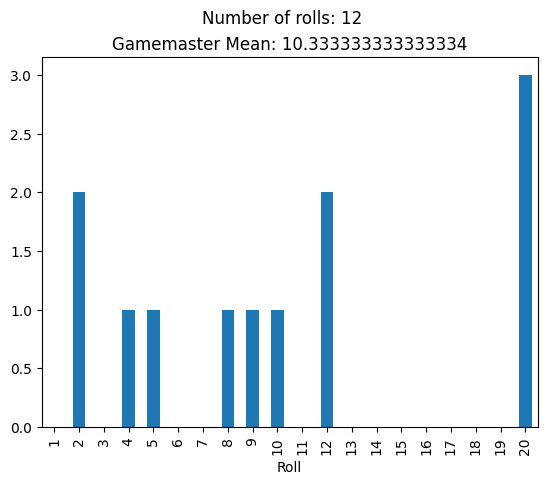

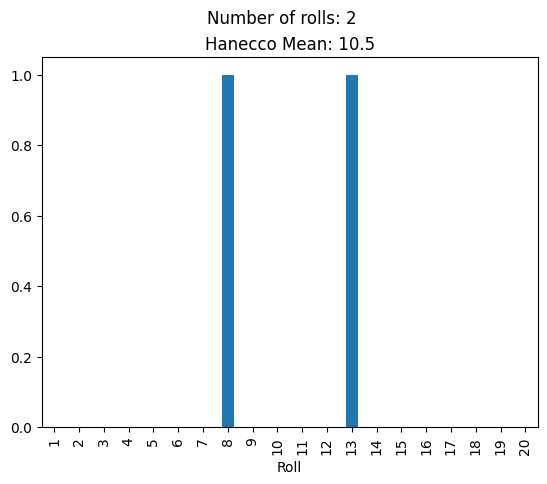

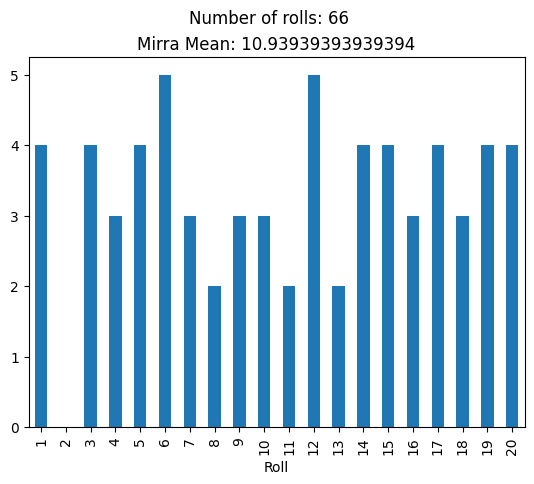

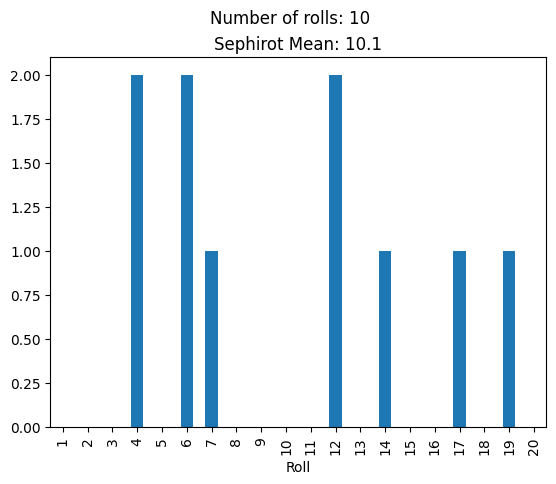

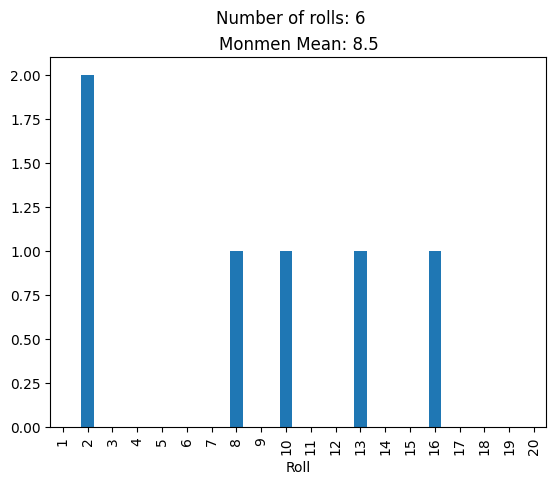

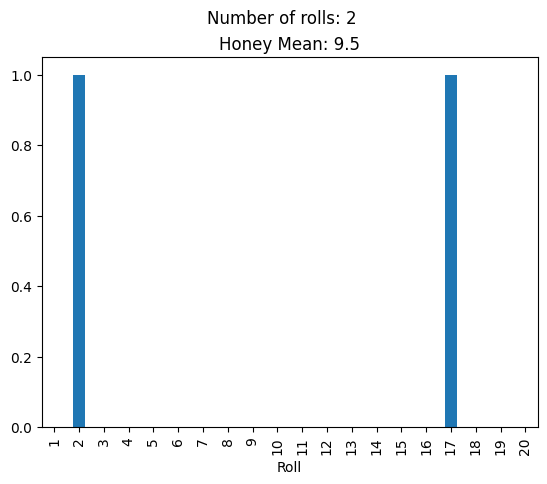

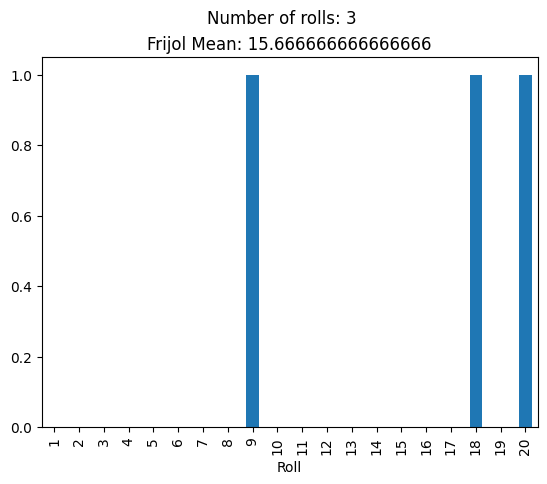

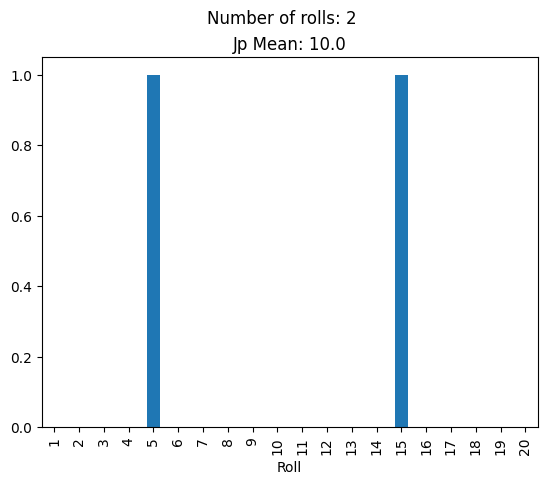

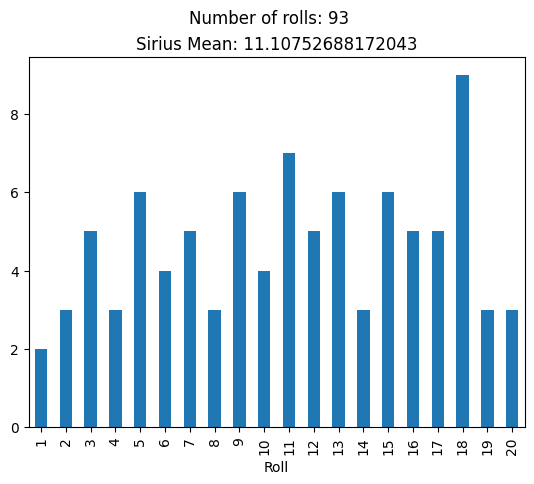

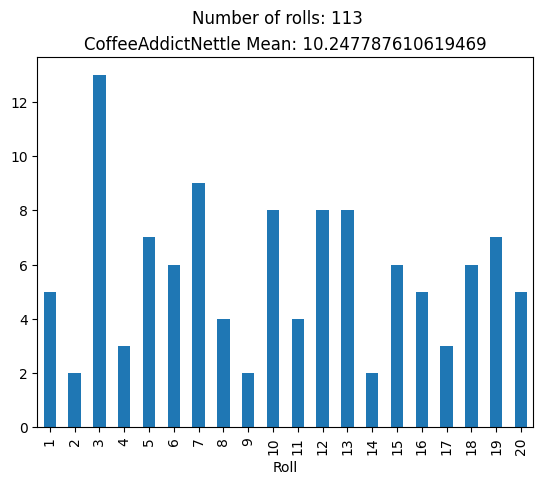

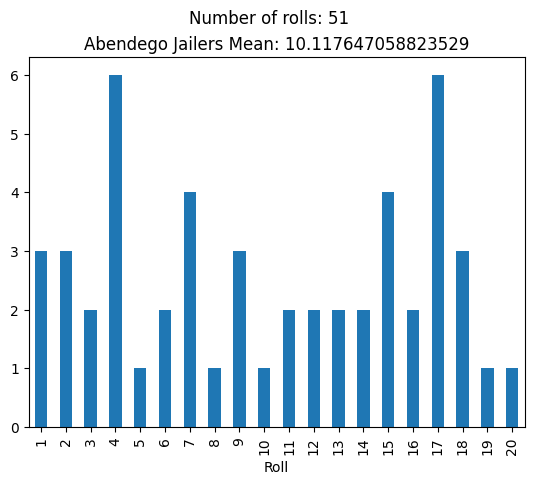

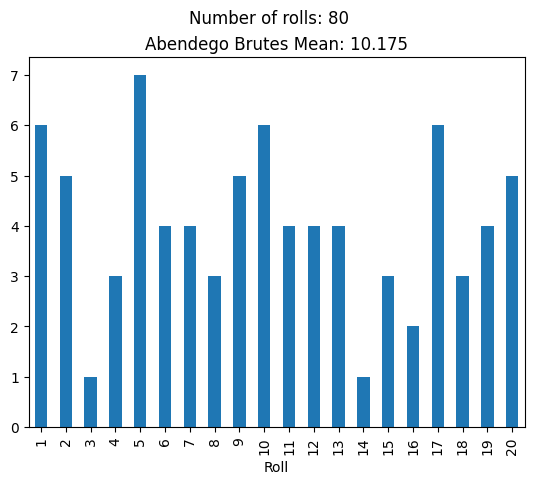

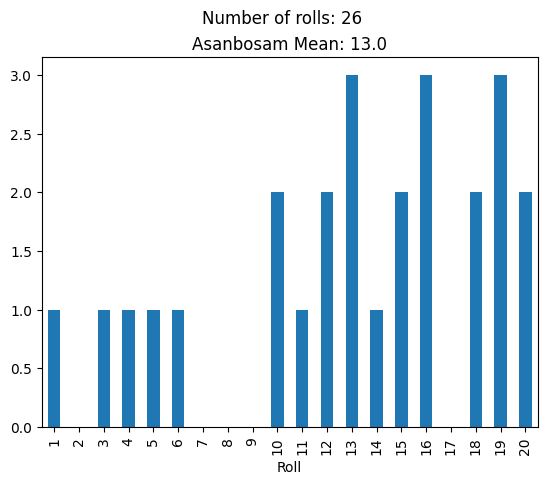

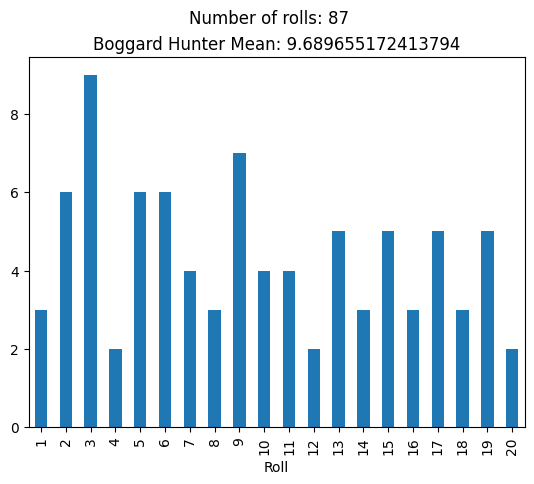

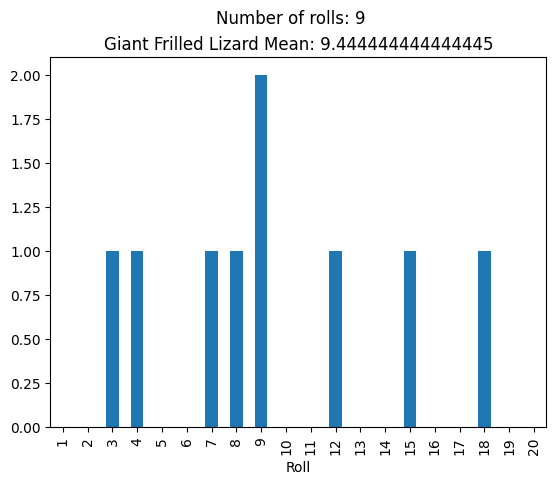

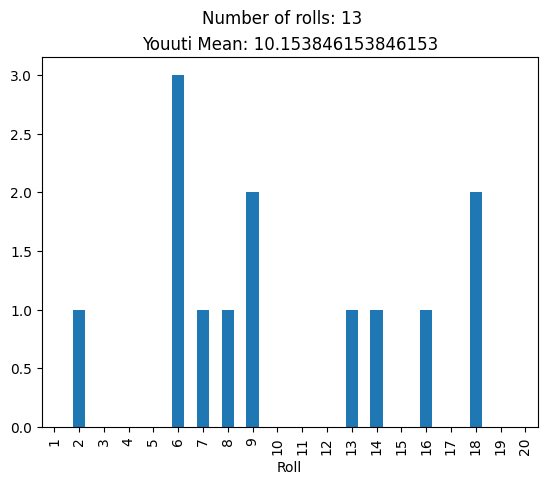

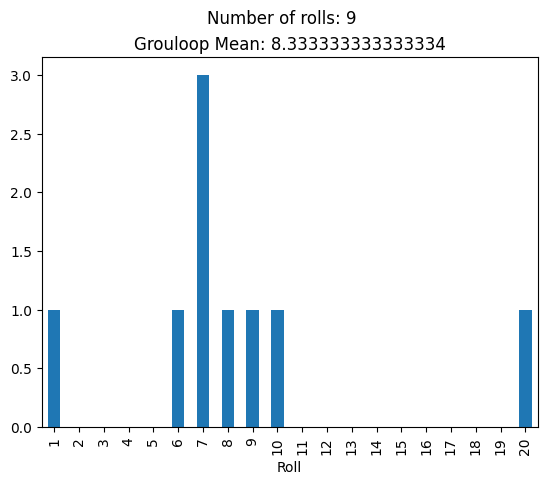

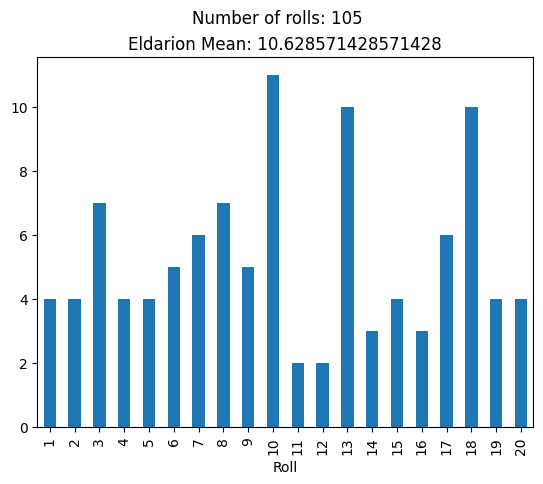

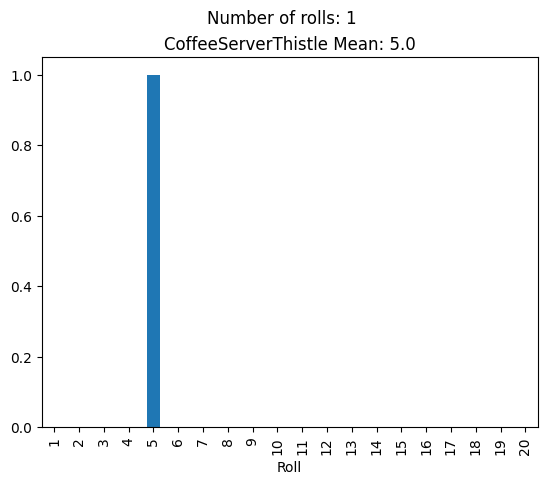

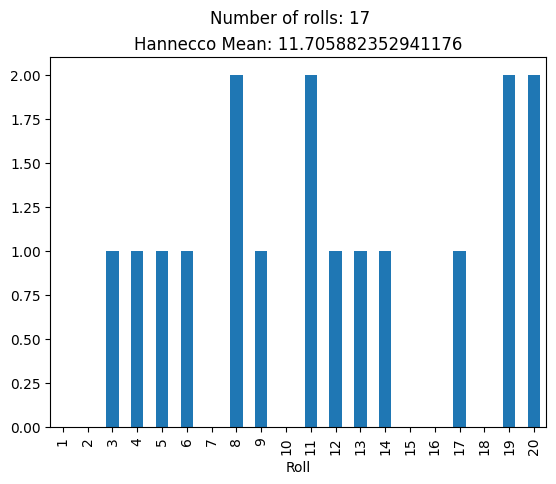

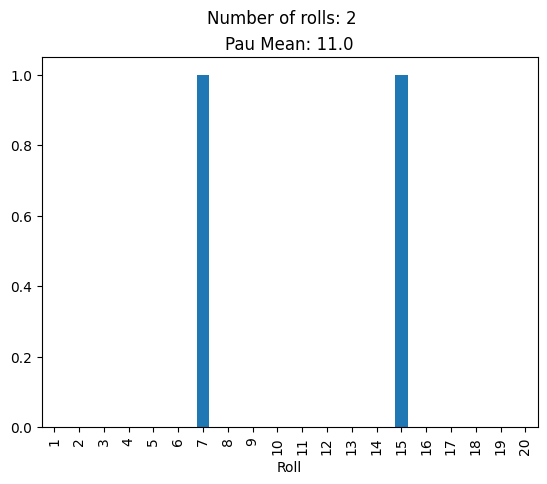

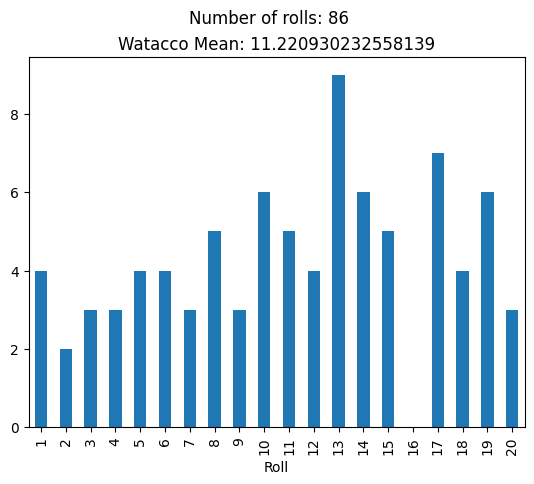

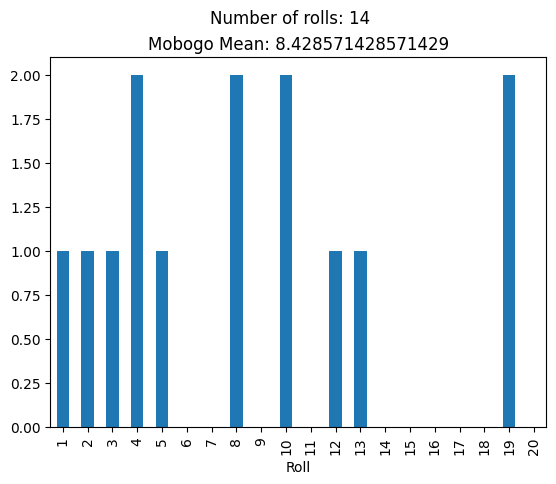

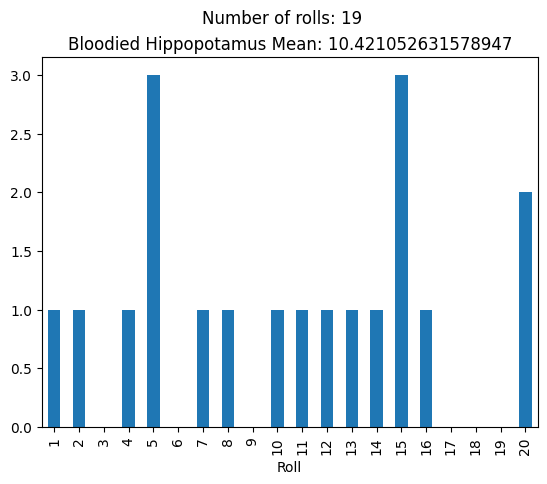

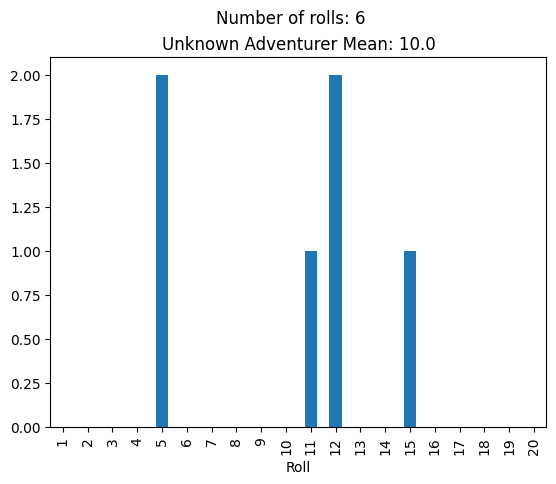

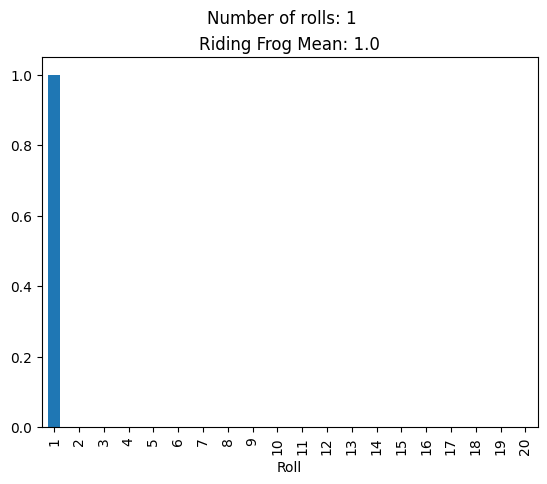

In [92]:
summary = []
sinceWhen = datetime(2024,2,13)
x_dice = []
searchString = ""
for char in characters:
    historic = []
    x_dice = []
    rolls = pd.DataFrame(data ={"Rolls":[0]*20})
    rolls.index = rolls.index+1
    newdf = df[df["Character"] == char]
    newdf = newdf[newdf["Date"] >= sinceWhen]
    #newdf["D20 Roll"] = pd.to_numeric(newdf["D20 Roll"])
    newdf = newdf.loc[newdf['Action'].str.contains(searchString, regex=False)]
    if len(newdf.index) > 0:
        plt.figure()
        counts = newdf['D20 Roll'].value_counts()
        counts = counts.to_frame()
        counts.index = pd.to_numeric(counts.index)
        counts = counts.sort_index()
        newRolls = pd.concat([rolls, counts],axis=1)
        newRolls = newRolls.fillna(value={"D20 Roll":0})
        newRolls['D20 Roll'].plot.bar()
        plt.xlabel('Roll')
        plt.title(char + " Mean: " + str(newdf['D20 Roll'].mean()))
        plt.suptitle("Number of rolls: " + str(len(newdf.index)))
        plt.savefig("char/" + char + ".jpg", dpi=72)
        summary.append([newdf['D20 Roll'].mean(),char,len(newdf.index), newdf['D20 Roll'].std()])   
summary.sort()

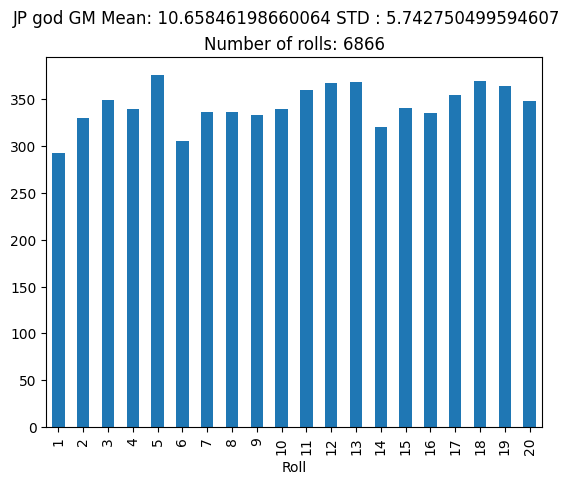

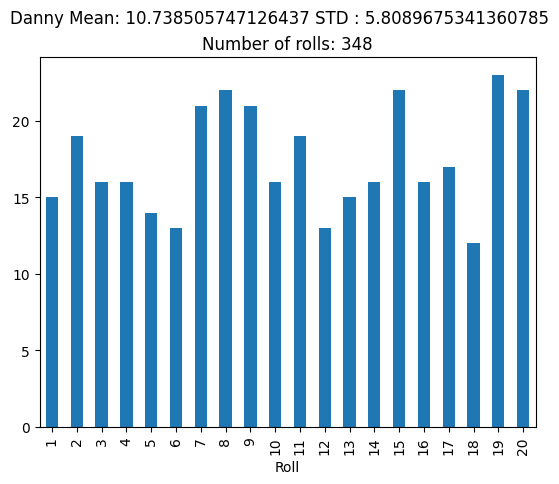

In [93]:
summary = []
sinceWhen = datetime(2020,7,17)
x_dice = []
searchString = ""
for player in players:
    historic = []
    x_dice = []
    rolls = pd.DataFrame(data ={"Rolls":[0]*20})
    rolls.index = rolls.index+1
    newerdf = df[df["Player"] == player]
    #newdf = newdf[newdf["Date"] >= sinceWhen]
    #newerdf["D20 Roll"] = pd.to_numeric(newerdf["D20 Roll"])
    #newerdf = newerdf.loc[newerdf['Action'].str.contains(searchString, regex=False)]
    if len(newerdf.index) > 0:
        plt.figure()
        counts = newerdf['D20 Roll'].value_counts()
        counts = counts.to_frame()
        counts.index = pd.to_numeric(counts.index)
        counts = counts.sort_index()
        newRolls = pd.concat([rolls, counts],axis=1)
        newRolls = newRolls.fillna(value={"D20 Roll":0})
        newRolls['D20 Roll'].plot.bar()
        plt.xlabel('Roll')
        plt.suptitle(player + " Mean: " + str(newerdf['D20 Roll'].mean()) + " STD : " + str(newerdf['D20 Roll'].std()))
        plt.title("Number of rolls: " + str(len(newerdf.index)))
        plt.savefig("player/" + player + ".jpg", dpi=72)
        summary.append([newerdf['D20 Roll'].mean(),player,len(newerdf.index)])   
summary.sort()

In [53]:
todaydf = df[df["Date"] > sinceWhen]
todaydf.to_csv("todaydf.csv")
df.to_csv("all.csv")
todaydf

,Character,Player,Roll Result,Action,D20 Roll,Date,general
0,Lizardo Lagartijo,Frijol,26,Not specified,17,2021-07-08,other
1,Lizardo Lagartijo,Frijol,16,Not specified,7,2021-07-10,other
2,Monke,Salva,6,Not specified,1,2021-07-13,other
3,Max,JP god GM,14,Not specified,14,2021-07-13,other
4,Castiel,Danny,20,Not specified,14,2021-07-13,other
...,...,...,...,...,...,...,...
1983,Sarvel Ever-Hunger,JP god GM,55,Not specified,20,2023-02-28,other
1984,Literally Me,Sebas,54,Not specified,14,2023-02-28,other
1985,Sarvel Ever-Hunger,JP god GM,47,Not specified,4,2023-02-28,other
1986,Literally Me,Sebas,54,Not specified,18,2023-02-28,other


In [90]:
summary.reverse()
summary
chardf = df["Character"]
chardf.drop_duplicates(keep='first').to_csv("chardf.csv")

In [ ]:
summary